<a href="https://colab.research.google.com/github/naluoHUST/My-ML-learnings/blob/master/ClassificationIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
data = load_iris()
data.data.shape

(150, 4)

In [ ]:
data.target.shape

(150,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.data,
    data.target,
    test_size = 0.4
)

In [ ]:
X_valid, X_test, Y_valid, Y_test = train_test_split(
    X_test,
    Y_test,
    test_size = 0.5
)

In [ ]:
X_train.shape,X_valid.shape,X_test.shape

((90, 4), (30, 4), (30, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train)
Y_valid = torch.tensor(Y_valid)
Y_test = torch.tensor(Y_test)

model = nn.Sequential(
    nn.Linear(4,6),
    nn.ReLU(),
    nn.Linear(6,3)
)
loss_fn=nn.CrossEntropyLoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr)

def evaluate(model,X_valid,Y_valid):
  with torch.no_grad():
    Y_pred = model(X_valid)
  Y_pred = torch.argmax(Y_pred,dim=1)
  return sum(Y_pred==Y_valid)/len(Y_valid)


In [ ]:
epochs = 100
losses = []
for epoch in range(epochs):
  epoch_loss = []
  for x,y in zip(X_train, Y_train):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    epoch_loss.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  avg_loss = sum(epoch_loss)/len(epoch_loss)
  acc = evaluate(model,X_valid,Y_valid)
  print(f"Epoch {epoch} -- Loss {avg_loss} -- Acc {acc}")
  losses.append(avg_loss)

print(losses)

Epoch 0 -- Loss 0.9629086825582717 -- Acc 0.5666666626930237
Epoch 1 -- Loss 0.8220062739319272 -- Acc 0.5666666626930237
Epoch 2 -- Loss 0.6882609108255969 -- Acc 0.6666666865348816
Epoch 3 -- Loss 0.5860986857364575 -- Acc 0.7666666507720947
Epoch 4 -- Loss 0.5138421115361982 -- Acc 0.8333333134651184
Epoch 5 -- Loss 0.45989011948307357 -- Acc 0.8333333134651184
Epoch 6 -- Loss 0.4165140876546502 -- Acc 0.8999999761581421
Epoch 7 -- Loss 0.37980843140847154 -- Acc 0.8999999761581421
Epoch 8 -- Loss 0.34787122628962003 -- Acc 0.9333333373069763
Epoch 9 -- Loss 0.3198716688176824 -- Acc 0.9333333373069763
Epoch 10 -- Loss 0.2951097134086821 -- Acc 0.9333333373069763
Epoch 11 -- Loss 0.273202237021178 -- Acc 0.9333333373069763
Epoch 12 -- Loss 0.25405935325866774 -- Acc 0.9666666388511658
Epoch 13 -- Loss 0.23721476633412142 -- Acc 0.9666666388511658
Epoch 14 -- Loss 0.22211105947175788 -- Acc 0.9666666388511658
Epoch 15 -- Loss 0.20849446300417185 -- Acc 0.9666666388511658
Epoch 16 -- 

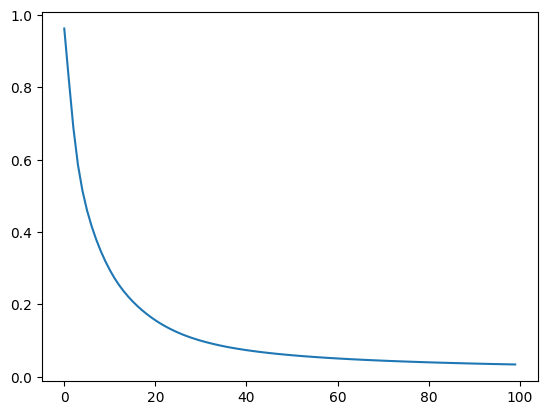

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
with torch.no_grad():
  Y_pred = model(X_test)
Y_pred = torch.argmax(Y_pred,dim=1)
Acc = sum(Y_pred==Y_test)/len(Y_test)
Acc

tensor(0.9333)